# Taller Ciencia De Datos

## 1. CARGA Y EXPLORACIÓN INICIAL DE LOS DATOS


In [48]:
import pandas as pd
import io, zipfile, requests

url = "https://archive.ics.uci.edu/static/public/352/online%2Bretail.zip"
r = requests.get(url)
with zipfile.ZipFile(io.BytesIO(r.content)) as z:
    with z.open("Online Retail.xlsx") as f:
        df = pd.read_excel(f, engine='openpyxl')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Actividad

In [49]:
print("Tipos de datos y conteo de valores no nulos ")
df.info()

Tipos de datos y conteo de valores no nulos 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [50]:
print(" Columnas con valores faltantes ")
nulos = df.isnull().sum()
porcentaje = (df.isnull().mean() * 100).round(2)
faltantes = pd.DataFrame({'Nulos': nulos, 'Porcentaje (%)': porcentaje})
display(faltantes.sort_values(by='Porcentaje (%)', ascending=False))



 Columnas con valores faltantes 


,Nulos,Porcentaje (%)
CustomerID,135080,24.93
Description,1454,0.27
StockCode,0,0.00
InvoiceNo,0,0.00
Quantity,0,0.00
InvoiceDate,0,0.00
UnitPrice,0,0.00
Country,0,0.00


In [51]:
print("\n Registros duplicados")
total_filas = len(df)
duplicados = df.duplicated().sum()
porc_duplicados = (duplicados / total_filas) * 100
print(f"Total de filas: {total_filas}")
print(f"Registros duplicados: {duplicados} ({porc_duplicados:.2f}%)")



 Registros duplicados
Total de filas: 541909
Registros duplicados: 5268 (0.97%)


## 2. LIMPIEZA Y TRANSFORMACIÓN


In [52]:
original_filas = len(df)

df = df.drop_duplicates()
df = df.dropna(subset=['CustomerID', 'Description'])
df['Total'] = df['Quantity'] * df ['UnitPrice']
df['Description'] = df['Description'].str.lower().str.strip()
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

final_filas = len(df)

eliminadas = original_filas - final_filas
porcentaje_eliminadas = (eliminadas / original_filas) * 100
print(f"Filas originales: {original_filas}")
print(f"Filas finales: {final_filas}")
print(f"Filas eliminadas: {eliminadas} ({porcentaje_eliminadas:.2f}%)")


fecha_inicio = df['InvoiceDate'].min()
fecha_fin = df['InvoiceDate'].max()

print(f"Rango de fechas disponible: {fecha_inicio.date()} -> {fecha_fin.date()}")

Filas originales: 541909
Filas finales: 401604
Filas eliminadas: 140305 (25.89%)
Rango de fechas disponible: 2010-12-01 -> 2011-12-09


## 3. CONEXIÓN Y CONSULTA CON SQL

In [53]:
import sqlite3

conn = sqlite3.connect('ventas.db')
df.to_sql('ventas', conn, if_exists='replace', index=False)

consulta = """
SELECT Country, SUM(Total) As TotalVentas
FROM ventas
GROUP BY Country
ORDER BY TotalVentas DESC
LIMIT 10;
"""
top_paises = pd.read_sql_query(consulta, conn)
top_paises


,Country,TotalVentas
0,United Kingdom,6747156.154
1,Netherlands,284661.540
2,EIRE,250001.780
3,Germany,221509.470
4,France,196626.050
5,Australia,137009.770
6,Switzerland,55739.400
7,Spain,54756.030
8,Belgium,40910.960
9,Sweden,36585.410


### Actividad

In [54]:
consulta_avg = """
SELECT Country, ROUND(AVG(Total), 2) AS PromedioTransaccion, ROUND(SUM(Total), 2) AS TotalVentas, COUNT(*) AS NumeroTransacciones
FROM ventas
GROUP BY Country
ORDER BY PromedioTransaccion DESC;
"""

promedio_pais = pd.read_sql_query(consulta_avg, conn)
promedio_pais

,Country,PromedioTransaccion,TotalVentas,NumeroTransacciones
0,Netherlands,120.06,284661.54,2371
1,Australia,108.91,137009.77,1258
2,Japan,98.72,35340.62,358
3,Sweden,79.36,36585.41,461
4,Denmark,48.25,18768.14,389
5,Lithuania,47.46,1661.06,35
6,Singapore,39.83,9120.39,229
7,Lebanon,37.64,1693.88,45
8,Brazil,35.74,1143.60,32
9,EIRE,33.45,250001.78,7475


## 4. Análisis Temporal

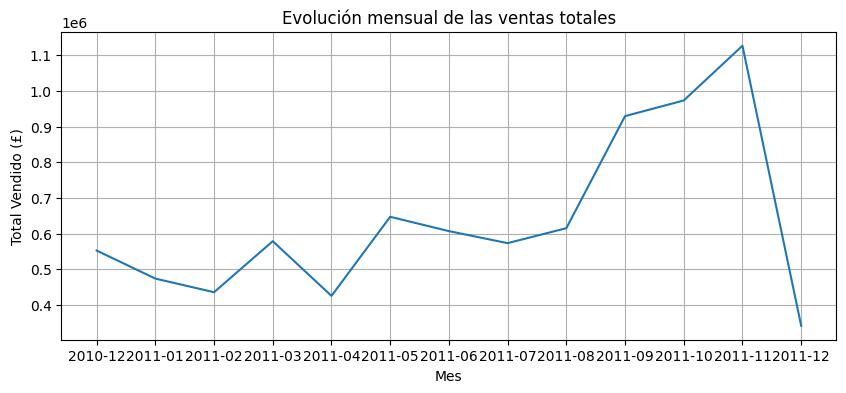

In [55]:
df['Mes'] = df['InvoiceDate'].dt.to_period('M')
ventas_mensuales = df.groupby('Mes')['Total'].sum().reset_index()

import matplotlib.pyplot as plt 
plt.figure(figsize=(10,4))
plt.plot(ventas_mensuales['Mes'].astype(str), ventas_mensuales['Total'])
plt.title('Evolución mensual de las ventas totales')
plt.xlabel('Mes')
plt.ylabel('Total Vendido (£)')
plt.grid(True)
plt.show()

## 5. Visualización Comparativa


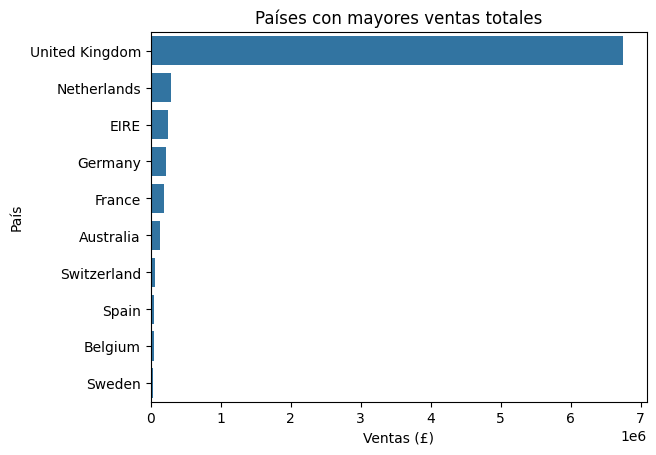

In [56]:
import seaborn as sns

sns.barplot(x= 'TotalVentas', y='Country', data=top_paises)
plt.title('Países con mayores ventas totales')
plt.xlabel('Ventas (£)')
plt.ylabel('País')
plt.show()



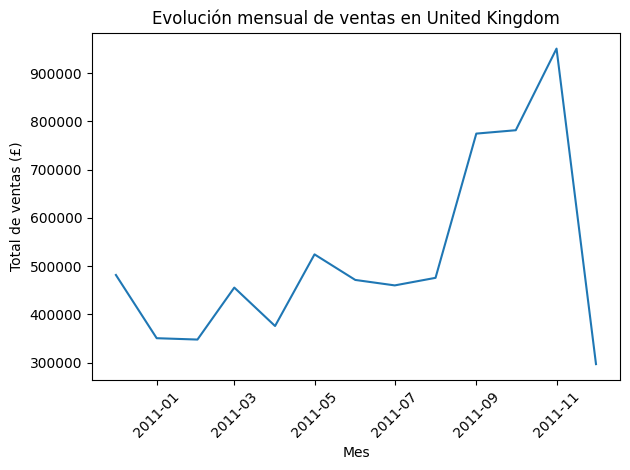

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

pais = 'United Kingdom'
df['Mes'] = df['InvoiceDate'].dt.to_period('M')
df_pais = df[df['Country'] == pais].copy()

serie_pais = df_pais.groupby('Mes')['Total'].sum().reset_index()
serie_pais['Mes'] = serie_pais['Mes'].dt.to_timestamp()

sns.lineplot(x='Mes', y='Total', data=serie_pais)
plt.title(f'Evolución mensual de ventas en {pais}')
plt.xlabel('Mes')
plt.ylabel('Total de ventas (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 6. Métricas de Clientes

In [58]:
consulta_clientes = """
SELECT CustomerID,
        COUNT(DISTINCT InvoiceNo) AS Compras,
        SUM(Total) AS GastoTotal,
        AVG(Total) As PromedioCompra
FROM ventas
WHERE Country = 'United Kingdom'
GROUP BY CustomerID
ORDER BY GastoTotal DESC
LIMIT 10;
"""
clientes_valiosos = pd.read_sql_query(consulta_clientes, conn)
clientes_valiosos

,CustomerID,Compras,GastoTotal,PromedioCompra
0,18102.0,62,256438.49,592.236697
1,17450.0,55,187322.17,535.206200
2,17511.0,46,88125.38,81.900911
3,16684.0,31,65892.08,234.491388
4,13694.0,60,62690.54,107.346815
5,15311.0,118,59284.19,23.924209
6,13089.0,118,57322.13,30.934771
7,14096.0,34,57120.91,11.139023
8,15061.0,55,54228.74,132.265220
9,16029.0,76,53168.69,196.921074


## 7. Integración con API de Divisas

In [59]:
import requests

respuesta = requests.get("https://api.frankfurter.app/latest?from=USD&to=EUR,COP").json()
print(respuesta)

tasas = pd.DataFrame(respuesta['rates'].items(), columns=['Moneda', 'Tasa'])
tasas

# Conversion de ventas a otras monedas
usd_to_eur = tasas.loc[tasas['Moneda']=='EUR', 'Tasa'].values[0]

serie_pais['Total_EUR'] = serie_pais['Total'] * usd_to_eur
serie_pais.head()

{'amount': 1.0, 'base': 'USD', 'date': '2025-10-24', 'rates': {'EUR': 0.86118}}


,Mes,Total,Total_EUR
0,2010-12-01,481675.230,414809.074571
1,2011-01-01,350668.800,301988.957184
2,2011-02-01,347856.550,299567.103729
3,2011-03-01,455534.070,392296.830403
4,2011-04-01,375919.231,323734.123353


### ANOTACIÓN
el cambio desde USD A COP no esta validado desde la propia API por lo que no se puede utilizar esa funcion 